# DATA7703 Homework1
*Name: Yupeng Wu*

*ID: 45960600*

*Using python3.7*

## Q1

In [29]:
import numpy as np
import openpyxl
wb = openpyxl.load_workbook("C:/Users/simon/Desktop/DATA7703/Data/Aubret 53172.xlsx")
ws = wb["Adult Tiger snakes"]
cells = ws['D']
body_mass = []
for cell in cells:
    if cell.value != None:
        body_mass.append(cell.value)
body_mass = body_mass[1:] # delete the title
body_mass = list(filter(None, body_mass)) # delete None 
print('Body mass of tiger snakes\' sample mean: %f, standard deviation: %f'%(np.mean(body_mass), np.std(body_mass)))

Body mass of tiger snakes' sample mean: 467.487563, standard deviation: 288.088026


## Q2
(a)

&emsp;Regression. The model is used to predict a value, not to classify.

(b)

&emsp;Interpolation. This is because the prediction will less than either $y_{t-1}$ or $y_{t-2}$. The result will not out of range.

## Q3

In [45]:
def sum_to_n(arr, n):
    output = []
    delete = []
    for i in range(len(arr)):
        if i not in delete:
            for j in range(i+1,len(arr)):
                if arr[i] + arr[j] == n:
                    delete.append(j)
                    output.append([arr[i], arr[j]])
    return output

In [31]:
sum_to_n([1,2,3,4], 5)

[[1, 4], [2, 3]]

In [32]:
sum_to_n([1,4,5,3,3], 6)

[[1, 5], [3, 3]]

In [33]:
sum_to_n([1,2,5,6,3], 7)

[[1, 6], [2, 5]]

## Q4
(a)

&emsp;Column AG(32), AF(33), AJ(35), AK(36) are categorical.

(b)

In [34]:
import math
import pandas as pd
def calPearson(x,y):
    sum_x = sum(x)
    sum_y = sum(y)
    n = len(x)
    x_mean = float(sum_x+0.0)/n
    y_mean = float(sum_y+0.0)/n
    
    numerator = 0.0
    denominator = 0.0
    x_pow = 0.0
    y_pow = 0.0
    for i in range(n):
        numerator += (x[i]-x_mean)*(y[i]-y_mean)
    for i in range(n):
        x_pow += math.pow(x[i]-x_mean,2)
    for i in range(n):
        y_pow += math.pow(y[i]-y_mean,2)
    denominator = math.sqrt(x_pow*y_pow)
    p = numerator/denominator
    return p

df = pd.read_csv("C:/Users/simon/Desktop/DATA7703/Data/hw1mystery.csv", header=0)
df.dropna()
row, col = df.shape
p_value = []
for i in range(col-1):
    for j in range(i+1, col):
        try:
            p = calPearson(df[str(i)], df[str(j)])
            if not np.isnan(p):
                p_value.append(p)
        except TypeError:
            continue
abs_p = list(map(abs, p_value))
max_p = max(abs_p)
print("The index of the maximun absolute value in correlation list: "
      + str(abs_p.index(max_p)))
print("The value is: " + str(max_p))

The index of the maximun absolute value in correlation list: 0
The value is: 1.0


&emsp;In my code, I store all the corelation value in a list and it shows that the first correlation value in the list is the maximum. So, the two most strongly correlated features are feature 0 and 1. The Pearson correlationship of the two features is 1. Which means they have a linear relationship.

Note:

&emsp;The list is like: \["correlation between feature 0 & 1", ..., "correlation between feature 0 & 40", "correlation between feature 1 & 2", ......, "correlatio between feature 39 & 40"]


(c)

In [35]:
min_p = min(abs_p)
abs_p.index(min_p)
print("The index of the minimum absolute value in correlation list: "
      + str(abs_p.index(min_p)))
print("The value is: " + str(min_p))

The index of the minimum absolute value in correlation list: 84
The value is: 0.0003263863704765937


&emsp;So the smallest absolute value of the pearson correlation is between feature 2 and feature 9. Those two features have a very weak relationship.

(d)

In [36]:
min_negative_p = min(p_value)
for i in range(len(p_value)):
    if p_value[i] == min(p_value):
        print("The index of the minimum value (negative) in correlation list: "
              + str(i))
        print("The value is: " + str(p_value[i]))

The index of the minimum value (negative) in correlation list: 167
The value is: -0.5469816068058979


&emsp;The minimum correlation value is between column 5 and column 18, which shows these two variables has the most opposite direction in the data. Which means a increase in feature 5 will cause a decrease in feature 18.

(e) i)

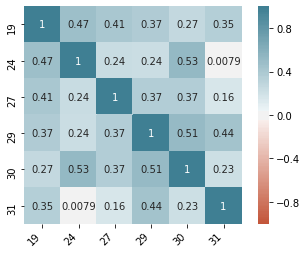

In [37]:
import seaborn as sns
df2 = pd.read_csv("C:/Users/simon/Desktop/DATA7703/Data/hw1mystery.csv", header=0)
df_4e = df2.iloc[:, [19, 24, 27, 29, 30, 31]]
corr = df_4e.corr()
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

&emsp;ii) The feature 24 and the feature 31 have the lowest correlation. The value is 0.0079.

&emsp;iii) The correlation is so small that it's almost zero, which means there's almost no linear relationship. However, there might be some other non linear relation.

## Q5

In [38]:
body_mass.sort()
body = np.array(body_mass)
Q1 = np.percentile(body, 25, interpolation='lower')
Q3 = np.percentile(body, 75, interpolation='higher')
P1 = []
P3 = []
r = 3
for points in body_mass:
    if abs(points - Q1) < r:
        P1.append(points)
    elif abs(points - Q3) < r:
        P3.append(points)
print("Q1:", Q1, ", Points close to Q1: ", P1)
print("Q3:", Q3, ", Points close to Q3: ", P3)

Q1: 247.0 , Points close to Q1:  [244.4, 245, 245, 245.5, 245.5, 246, 247, 247, 248, 248.3]
Q3: 620.0 , Points close to Q3:  [617.5, 618, 620, 622]


&emsp;For the boundary of the inter-quartile range of the body mass, Q1 is 247 and Q3 is 620. So, the closest data point for Q1 is 246 and 248, and for Q3 is 618 and 622.

## Q6

(a)

&emsp;The last three columns look like RGB data, trying to draw the figue.

In [43]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
rgb = df2.iloc[:, [37, 38, 39]]
rgb = [tuple(x) for x in rgb.values][8:-9]
rgb
width = 28
height = 28

image = Image.new('RGB', (width, height), (0, 0, 0))
draw = ImageDraw.Draw(image)
pixels = image.load()

index = 0
for x in range(width):
    for y in range(height):
        pixels[y, x] = (int(rgb[index][0]), int(rgb[index][1]), int(rgb[index][2]))
        index += 1
display(image)
#image.save('pokemon.jpg', 'jpeg')

&emsp;Which shows it is Pikachu!

(b)

&emsp;This is a dataset about Pokemon's information, including the attributes, types, egg steps, weakness types, height, weight and so on.